# TASK 01 - PRODIGY DATA SCIENCE INTERNSHIP 


##### CREATE  BAR CHART OR HISTOGRAM TO VISUALIZE THE DISTRIBUTION OF A CATEGORICAL OR CONTINUOS VARIABLES IN A DATASET

## **STEP 1 - IMPORT DATASET**

In [78]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [79]:
# import csv file
df = pd.read_csv(r"C:\Users\ARYA\OneDrive\Python project\Diwali Sales Data.csv",encoding= 'unicode_escape')

In [80]:
df.shape

(11251, 15)

In [81]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## **STEP 2- DATA CLEANING**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
#drop blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True) #two blank and irrelated columns were removed

In [8]:
#recheck 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df.shape

(11251, 13)

In [11]:
# drop null values
df.dropna(inplace=True)
# can aslo use df = df.dropna()

In [12]:
#recheck
df.shape #11251 - 11239 = 12 null values were dropped


(11239, 13)

In [13]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
#change datatype
df['Amount'].dtypes

dtype('float64')

In [15]:
df['Amount'] = df['Amount'].astype('int')

In [16]:
#recheck
df['Amount'].dtypes

dtype('int32')

In [17]:
#description 
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#### **In the Data Cleaning Process, the changes  was that made are;**

    1.Dropped blank or unrelated columns from the dataset - Status, unnamed1.
    
    2.Checked Null values and Dropped it - Amount had 12 null values which was removed.
    
    3.Changed Datatype - Amonut was in float64 which was changed to int32.

## **STEP 3 - EXPLORATORY DATA ANALYSIS**

#### **A) Gender Visualization**

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
df['Gender'].describe()

count     11239
unique        2
top           F
freq       7832
Name: Gender, dtype: object

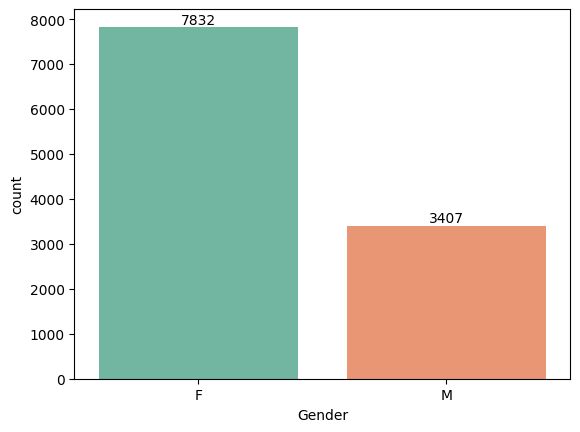

In [20]:
# plotting a bar chart for Gender and it's count

data = sns.countplot(x = 'Gender',hue="Gender",data = df,palette='Set2')

for bars in data.containers:
    data.bar_label(bars)



In [21]:
# Grouping gender and  total aount
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

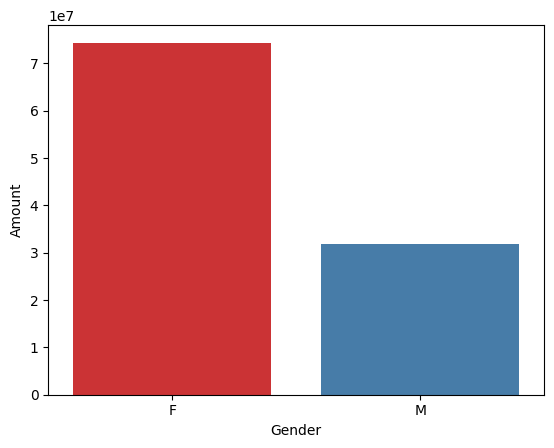

In [22]:
# plotting gender v/s Amount on  bar chart

sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount',hue ="Gender",data = sales_gender ,palette='Set1')



##### **Analyzing the visualizations above the insights obtained are;**

    1.From the first Bar chart by considering the Gender ,the total count of females is more than males nearly  double the size. 
    
    2.From the 2nd Bar Chart by considering the Gender & Amount , Females have more purchasing power than males.

#### **B) AGE VISUALIZATION**

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [24]:
df['Age Group'].describe()

count     11239
unique        7
top       26-35
freq       4541
Name: Age Group, dtype: object

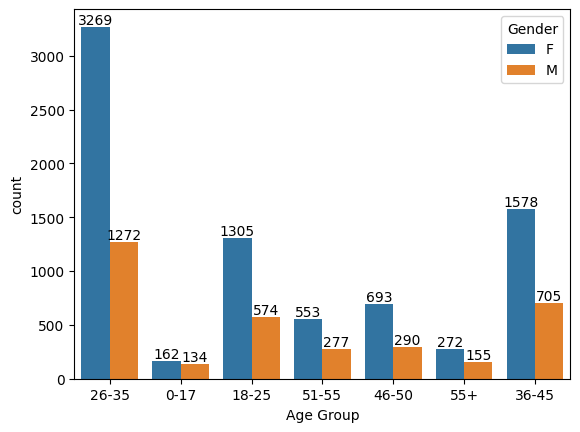

In [25]:
# plotting a bar chart for Age Group and it's count irrespective of Gender

data = sns.countplot(x = 'Age Group',hue="Gender",data = df)

for bars in data.containers:
    data.bar_label(bars)



In [26]:
#Grouping Age group ,Gender, and Total Amount in ascending order

df.groupby(['Gender','Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Age Group,Amount
2,F,26-35,30963953
3,F,36-45,15509956
1,F,18-25,11887003
9,M,26-35,11649489
4,F,46-50,6743393
10,M,36-45,6635038
5,F,51-55,5385208
8,M,18-25,5353729
12,M,51-55,2876269
11,M,46-50,2464451


<Axes: xlabel='Age Group', ylabel='Amount'>

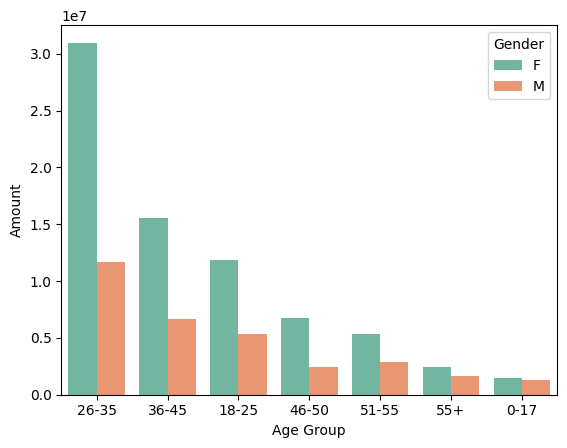

In [27]:
# plotting Age grouo v/s Amount on  bar chart irrespective of their gender

sales_age = df.groupby(['Gender','Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount',hue='Gender',data = sales_age , palette ='Set2')

##### **Analyzing the visualizations above the insights obtained are;**

    1. The Age group Between 26-35 is having High purchasing power.
    
    2. Considering the Gender, Females have more purchasing rate than Males.

#### **c) STATE VISUALIZATION**

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [29]:
df['State'].describe()

count             11239
unique               16
top       Uttar Pradesh
freq               1944
Name: State, dtype: object

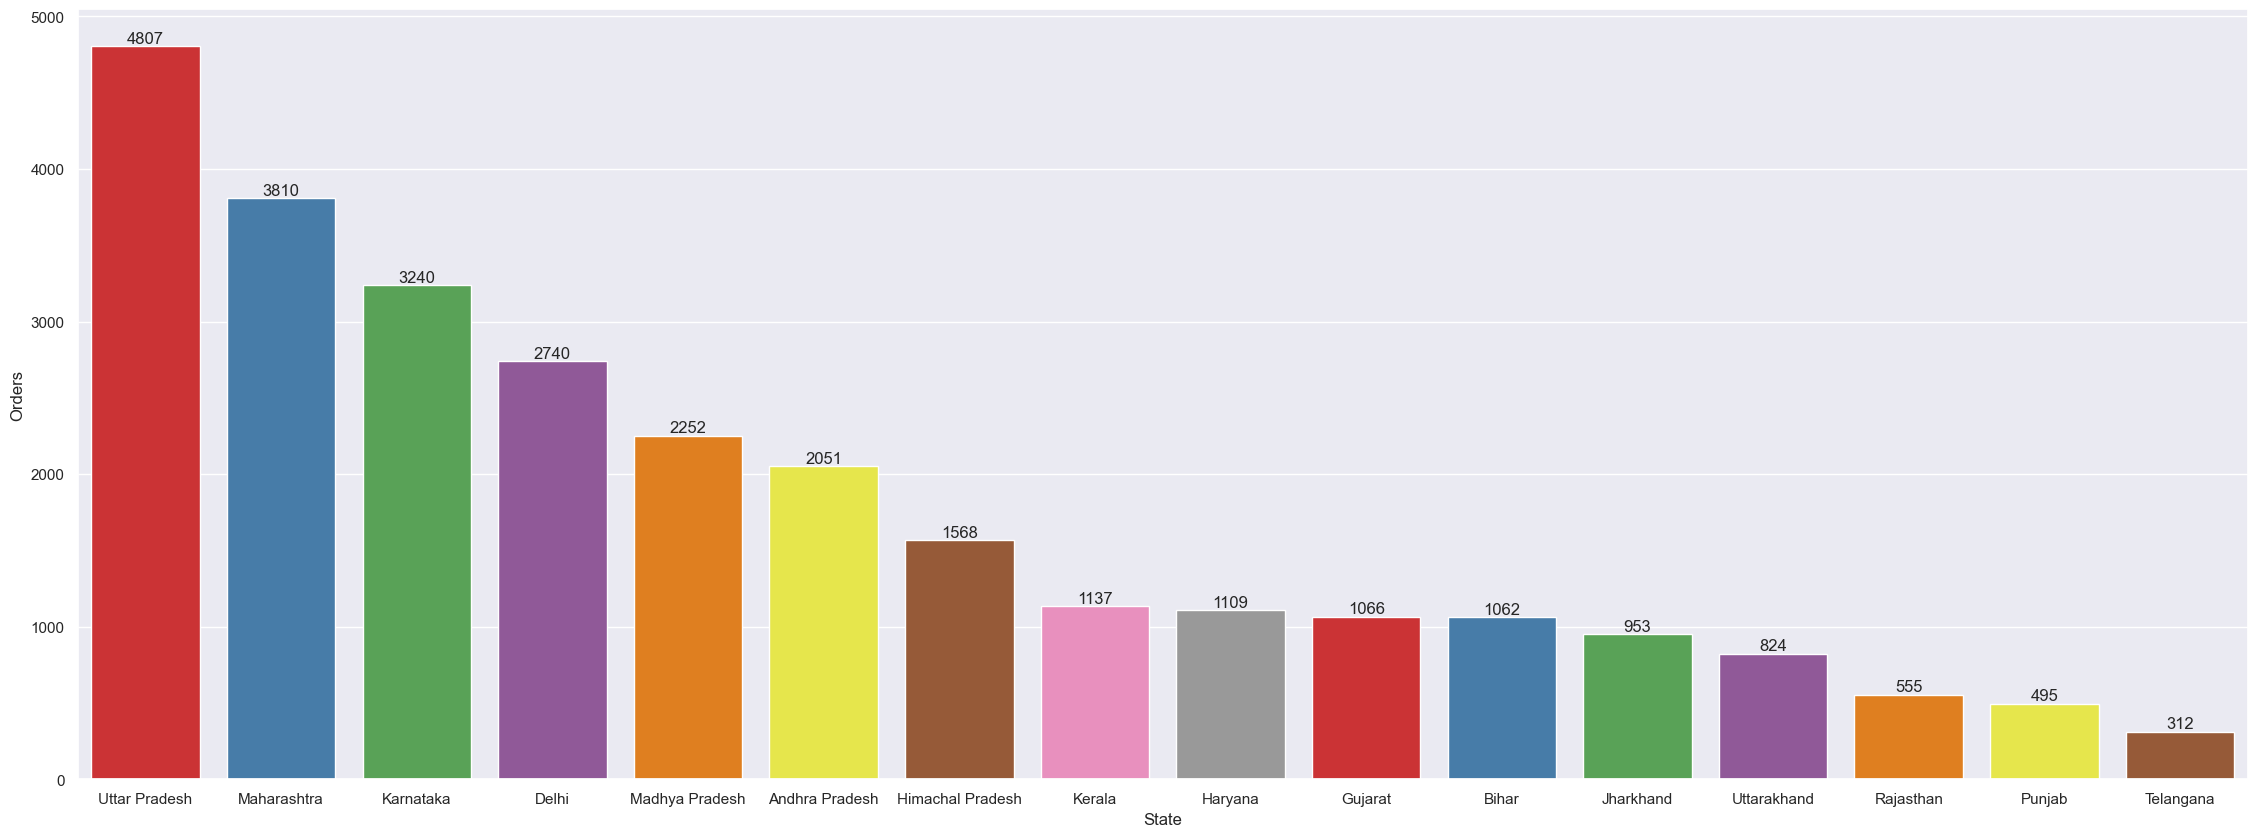

In [30]:
# plotting  total number of orders from All states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)

sns.set(rc ={'figure.figsize':(28,10)})

data = sns.barplot(x = 'State',y= 'Orders',hue='State',data = sales_state, palette ='Set1')

for bars in data.containers:
    data.bar_label(bars)


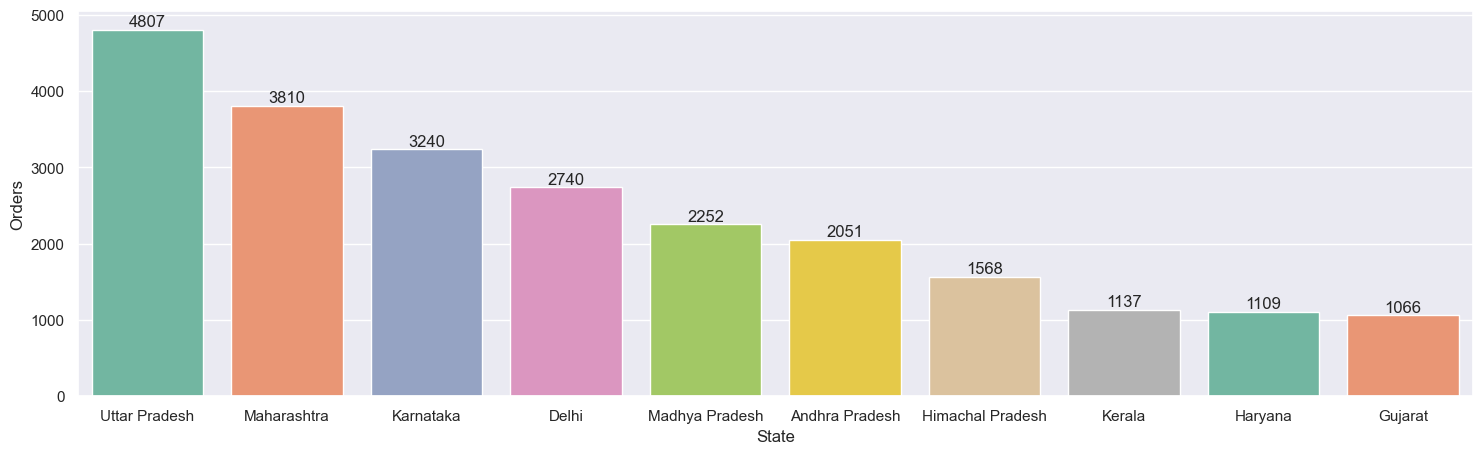

In [31]:
# plotting  total number of orders from Top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc ={'figure.figsize':(18,5)})

data = sns.barplot(x = 'State',y= 'Orders',hue='State',data = sales_state, palette ='Set2')

for bars in data.containers:
    data.bar_label(bars)

<Axes: xlabel='State', ylabel='Amount'>

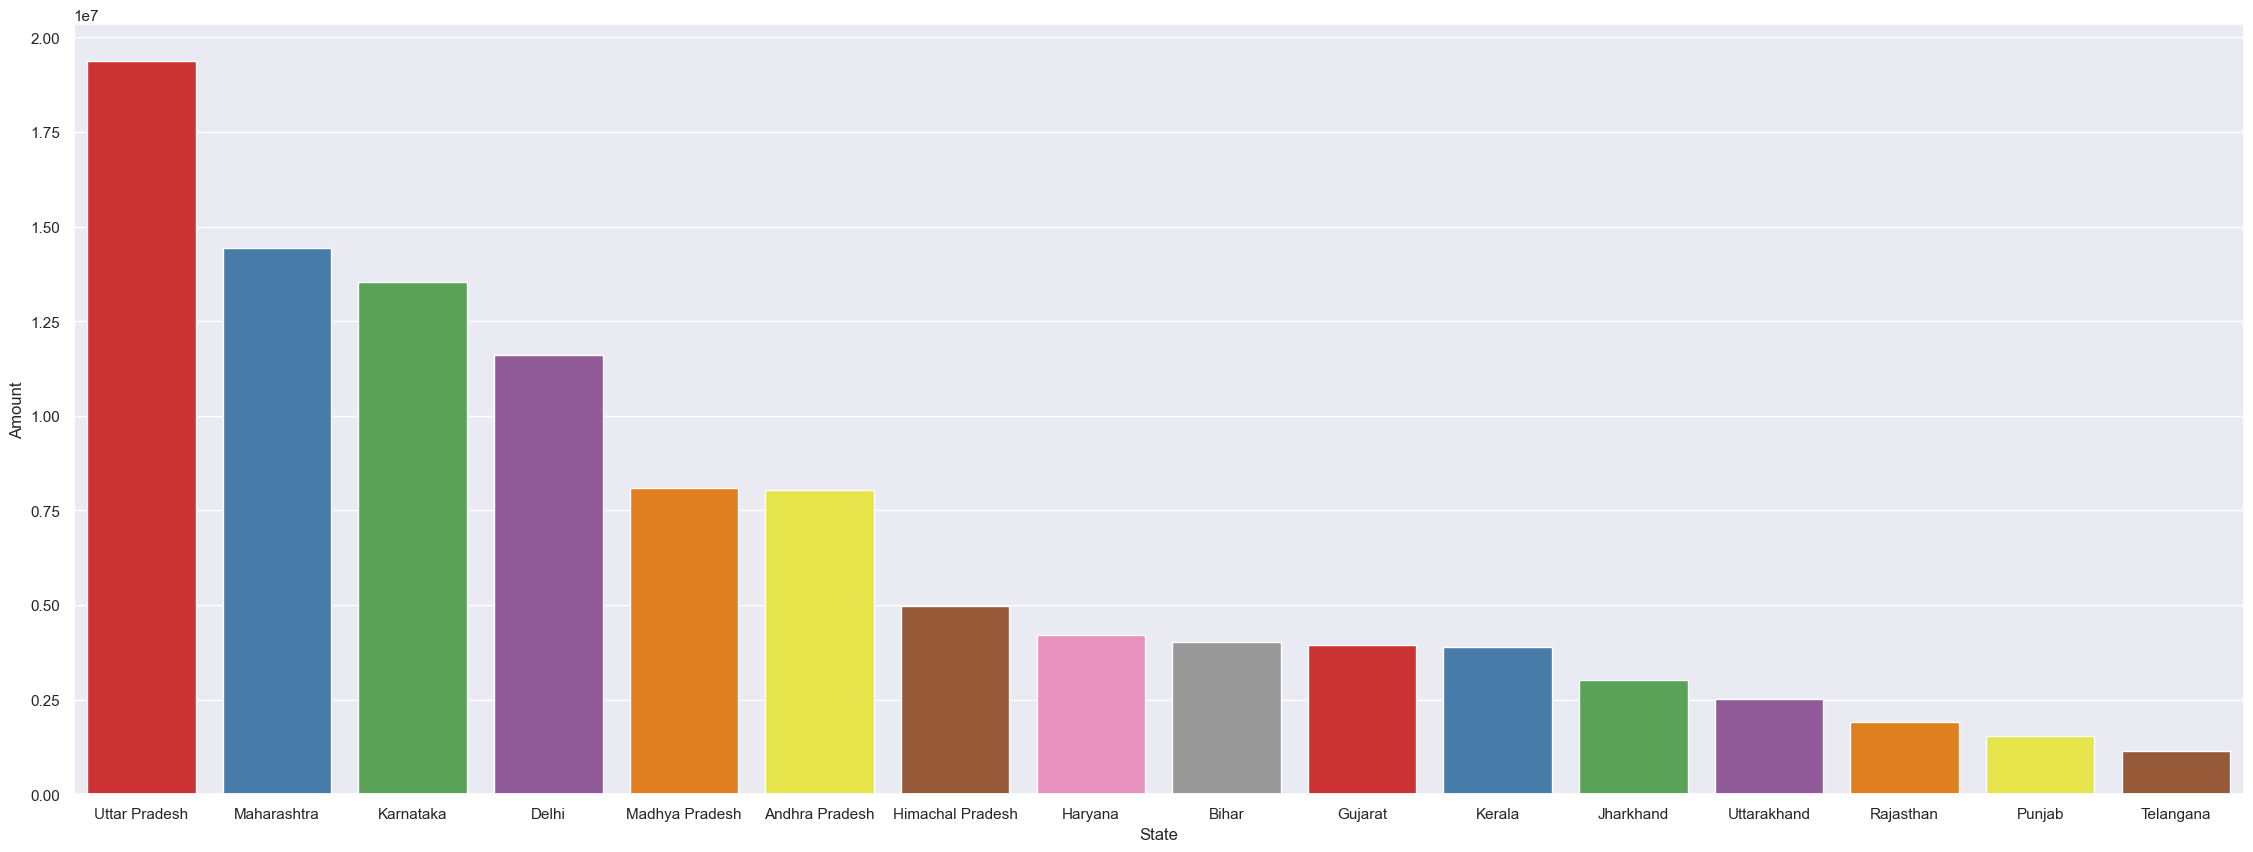

In [32]:
#  plotting total Amount/sales of  All states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc ={'figure.figsize':(28,10)})

sns.barplot(x = 'State',y= 'Amount',hue='State',data = sales_state, palette ='Set1')


<Axes: xlabel='State', ylabel='Amount'>

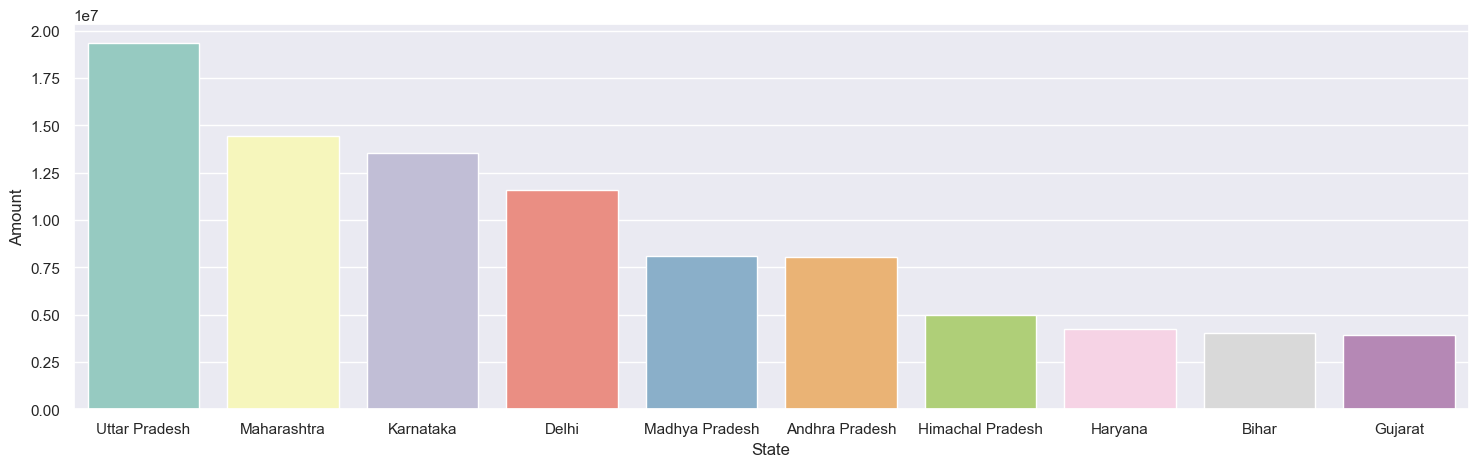

In [33]:
# plotting total Amount/sales Of  Top 10 States

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc ={'figure.figsize':(18,5)})

sns.barplot(x= 'State',y= 'Amount',data = sales_state,hue ='State', palette ='Set3')


##### **Analyzing the visualizations above, the insights obtained are;**

    1. While checking the description the unique values is 16 ie.There are 16 States.
    
    2. The first chart shows 16 states in ascending order  sorting by considering total orders in which the most orderd state is Uttar Pradesh and least ordered state is Telegana.
    
    3.The 2nd chart shows Top 10 states in ascending order  sorting by considering total orders in which Top 1 is UP.
    
    4.The 3rd chart shows the Total Amount or Sales of All 16 states in which the most sales was from Uttar Pradesh and least sales was from Telegana.
    
    5.The 4th chart shows the Total Amount or Sales of Top 10 states in which the Top 1 is UP.

    6.Comparing 3rd and 4th charts we can form an insight ie. From top 10 states according to total orders as well as total sales the positions was the same till top 7 but after that Kerala is not in top 10 list of total amount/sales and Bihar took the top 9th place.

#### **D) MARITAL STATUS - VISUALIZATION**


In [34]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

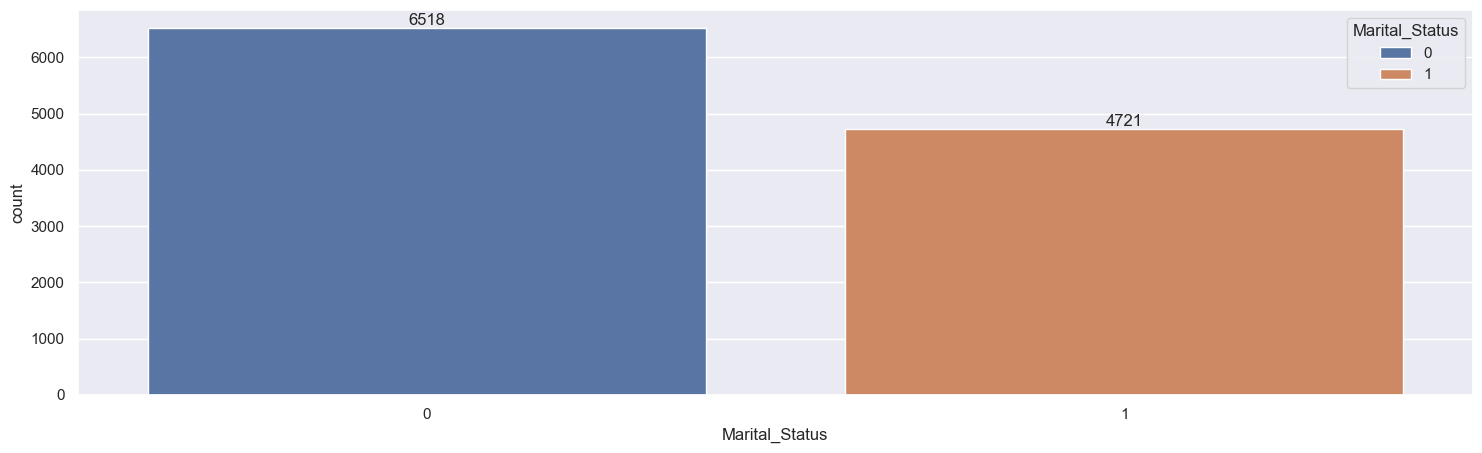

In [35]:
# plotting a bar chart of Marital Status and it's count

data = sns.countplot(x = 'Marital_Status',data = df,hue = 'Marital_Status')
sns.set(rc ={'figure.figsize':(6,5)})
for bars in data.containers:
    data.bar_label(bars)


<Axes: xlabel='Marital_Status', ylabel='Amount'>

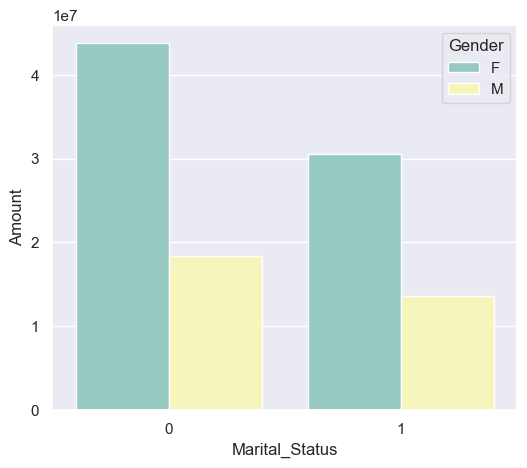

In [36]:
# plotting total Amount/sales of Marital Status sorted by Gender

sales_marital = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc ={'figure.figsize':(6,5)})

sns.barplot(x= 'Marital_Status',y= 'Amount',data = sales_marital,hue ='Gender', palette ='Set3')

##### **Analyzing the visualizations above the insights obtained are;**

    1.The 1st Chart shows the Total count of people married and unmarried.
    
    2 The count of married people are 6518 and unmarried are 4721 ie Total amount of purchases is more by married than unmarried people.
    
    3. The 2nd chart shows  the Total Amount of Sales done by Married and unmarried people in Both genders.
    
    4.Married Females purchases more than married males and also married females purchases more than unmarried females.
    
    

#### **E) OCCUPATION - VISUALIZATION**

In [37]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [38]:
df['Occupation'].describe()

count         11239
unique           15
top       IT Sector
freq           1583
Name: Occupation, dtype: object

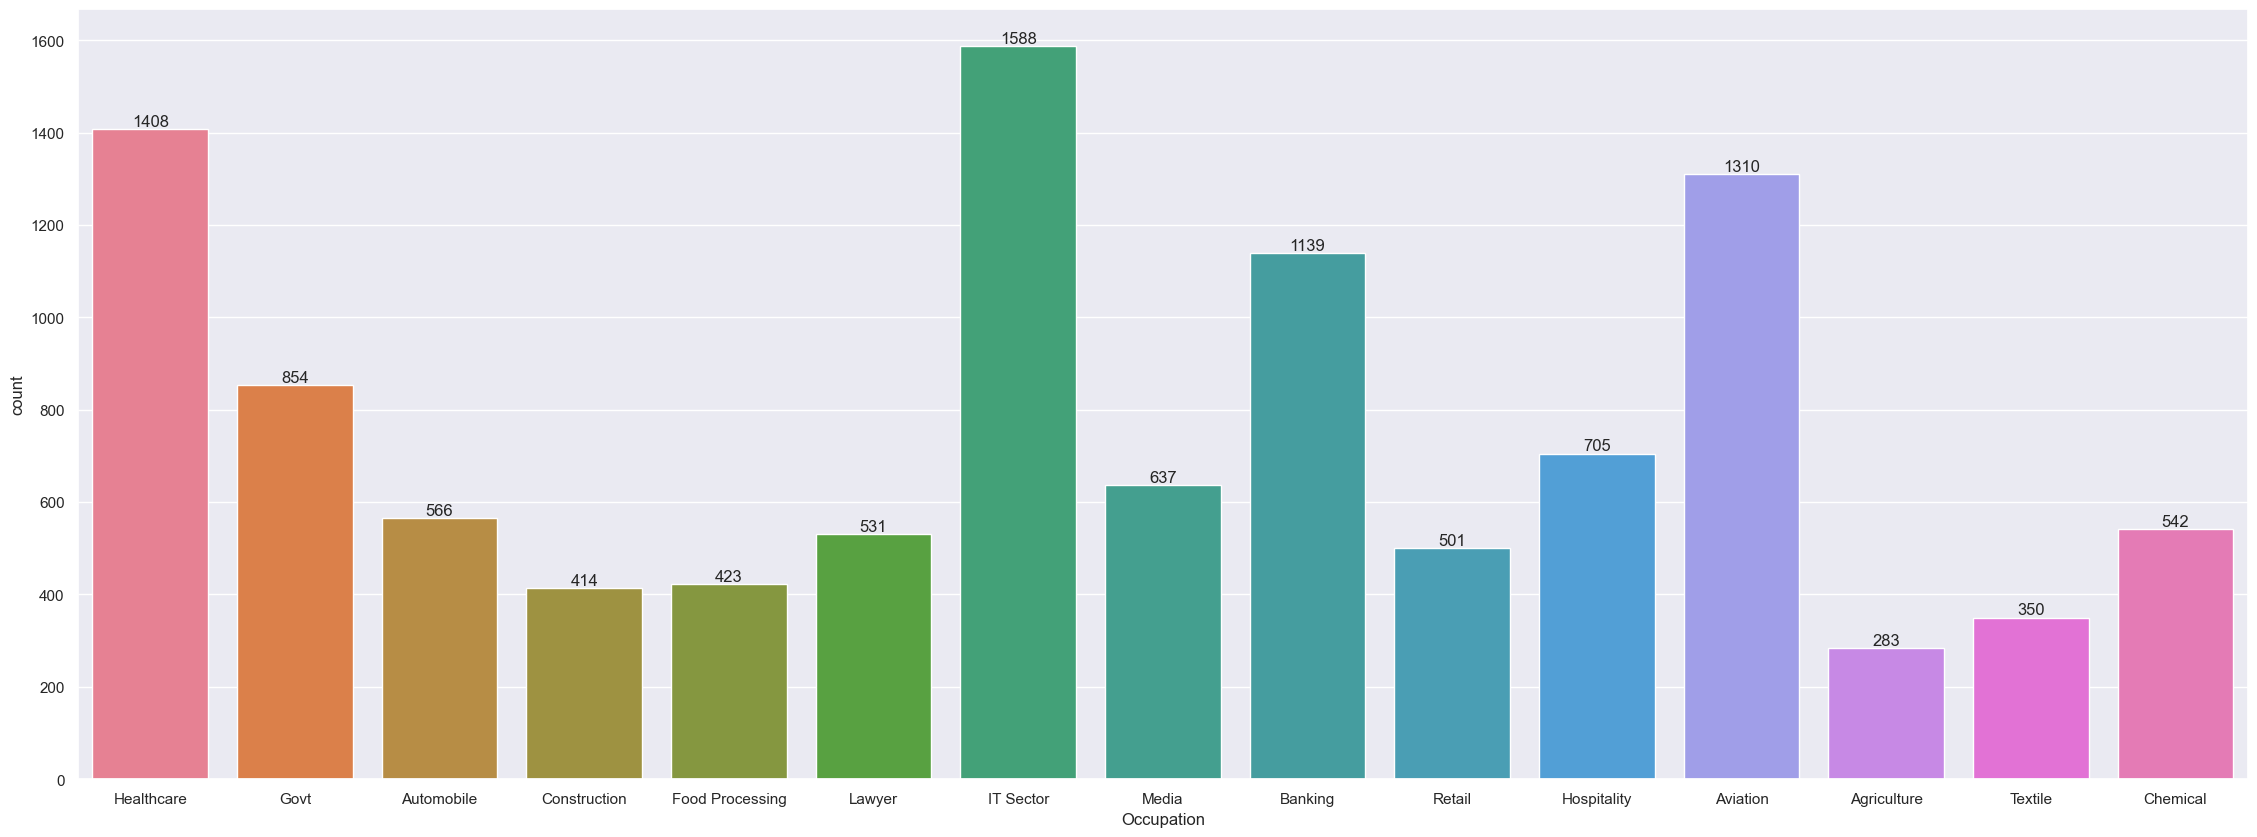

In [84]:
#plotting occupation with count

data = sns.countplot(x = 'Occupation',data =df,hue = 'Occupation')

sns.set(rc = {'figure.figsize':(28,10)})

for bars in data.containers:
    data.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

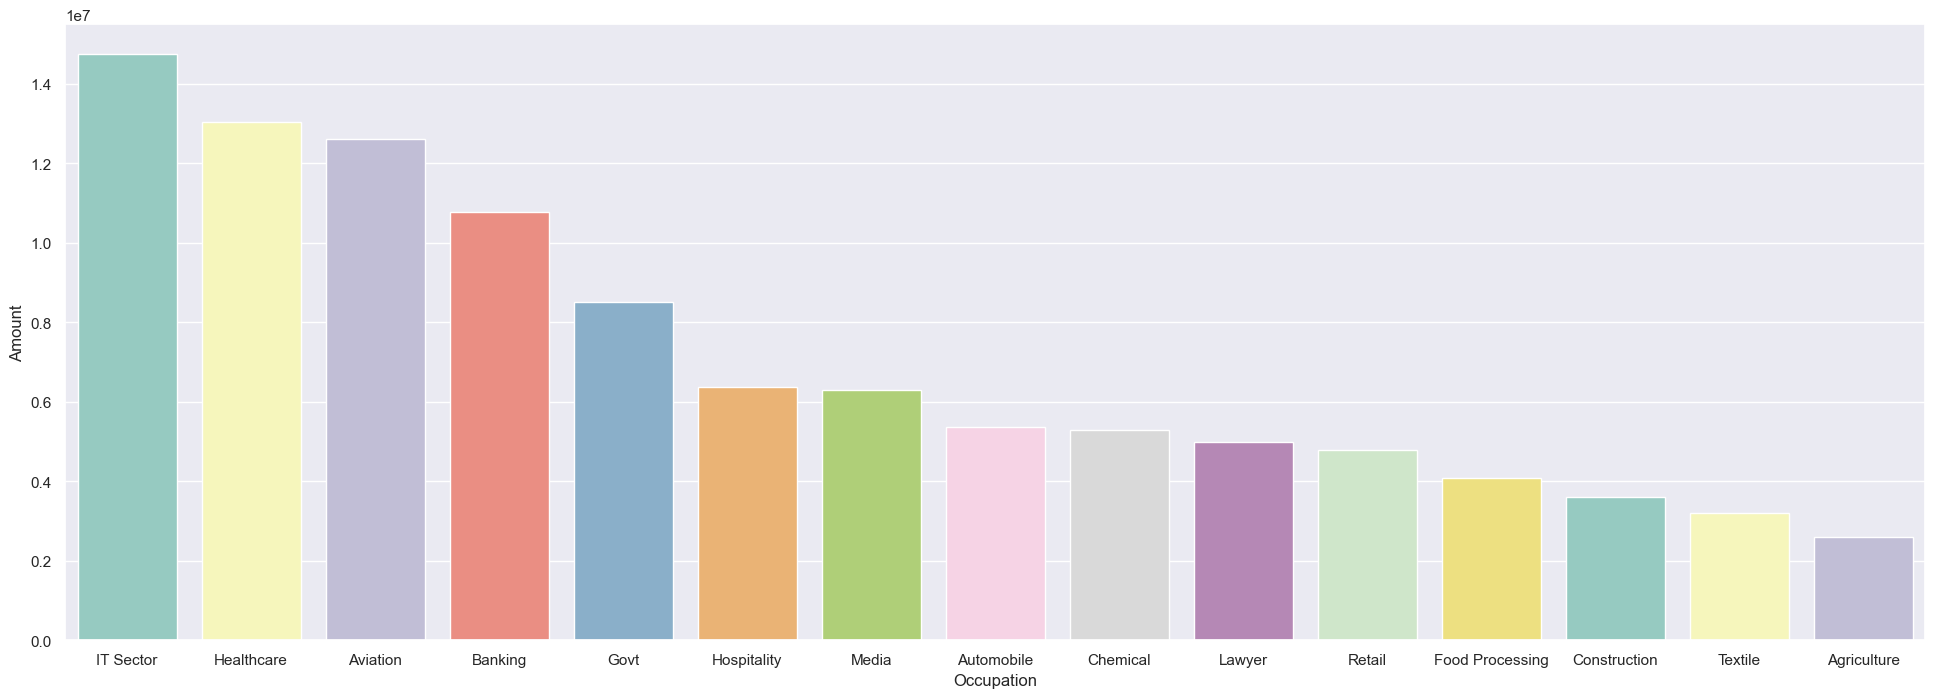

In [40]:
#plotting Occupations by Total Amount/Sales

sales_job = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc ={'figure.figsize':(24,8)})

sns.barplot(x= 'Occupation',y= 'Amount',data = sales_job,hue ='Occupation', palette ='Set3')

##### **Analyzing the visualizations above the insights obtained are;**

    1. The description shows that occupation has 15 unique values ie There are 15 sectors of occupation in this dataset.
    
    2. The 1st chart shows the count of occupations most people do ie IT sector,Health sector,Aviation and so on.

    3. The 2nd  Chart shows the Total Amount /Sales  rate of people working in different occupations in which The top most sector is IT sector and least purchasing rate is from people working in Agriculture sector,Textiles,etc

#### **F ) PRODUCT CATEGORY - VISUALIZATION**

In [41]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [42]:
df['Product_Category'].describe()

count                  11239
unique                    18
top       Clothing & Apparel
freq                    2655
Name: Product_Category, dtype: object

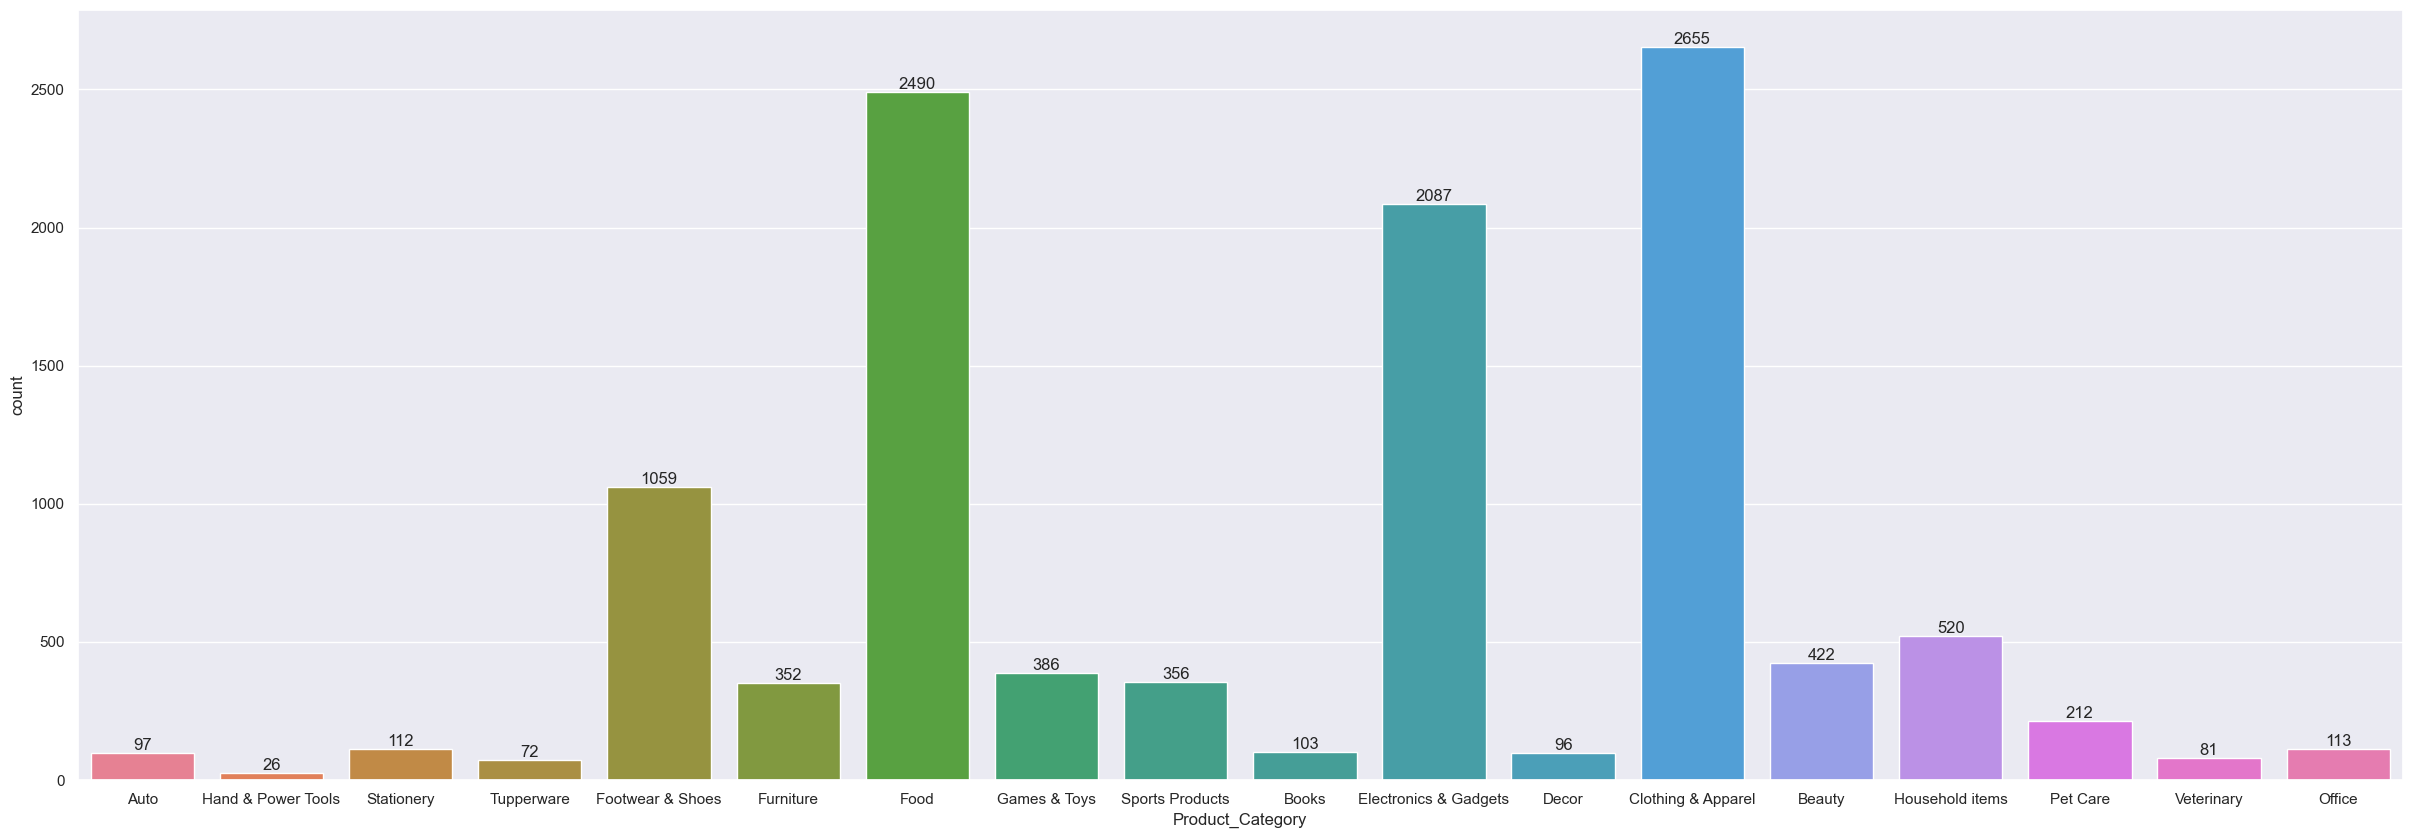

In [64]:
#plotting Product category ordered  with count

data = sns.countplot(x = 'Product_Category',data =df,hue = 'Product_Category')

sns.set(rc = {'figure.figsize':(35,10)})

for bars in data.containers:
    data.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

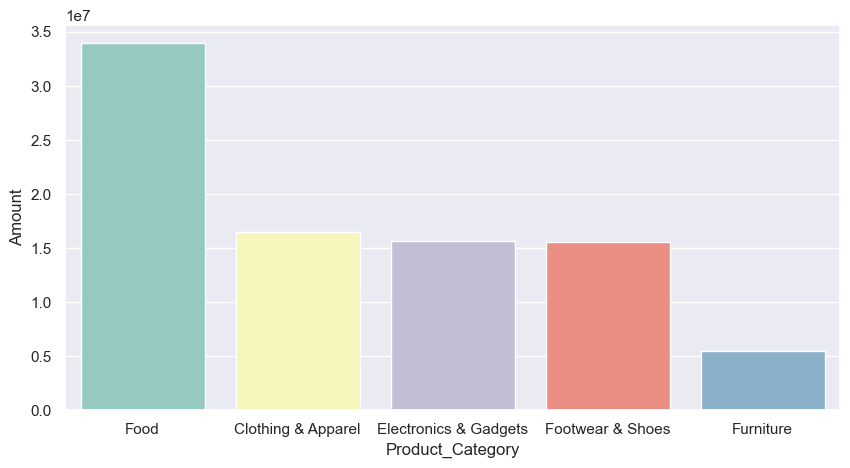

In [71]:
#plotting Top 5  Product category sold  using Total Amount/Sales  values in ascending order

sales_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc ={'figure.figsize':(10,5)})

sns.barplot(x= 'Product_Category',y= 'Amount',data = sales_product,hue ='Product_Category', palette ='Set3')

##### **Analyzing the visualizations above the insights obtained are;**

    1.Product category description shows 18 unique categories of products.
    
    2. Most ordered product categories are Clothing & Apparels ,Electronic gadgets, Food,etc.
    
    3. Top 5 most Sold product categories are Food, Clothing & Apparel, Electronics & Gadgets , Footwear & Shoes  and Furniture.
    
    4. Here Top ordered product category is Clothing & Apparels but Top sold category is Food so people spend more money on expensive food and  also order more  Clothes & Apparels.

#### **G) PRODUCT ID - VISUALIZATION**

In [75]:
df['Product_ID'].describe()

count         11239
unique         2350
top       P00265242
freq             53
Name: Product_ID, dtype: object

<Axes: xlabel='Product_ID', ylabel='Orders'>

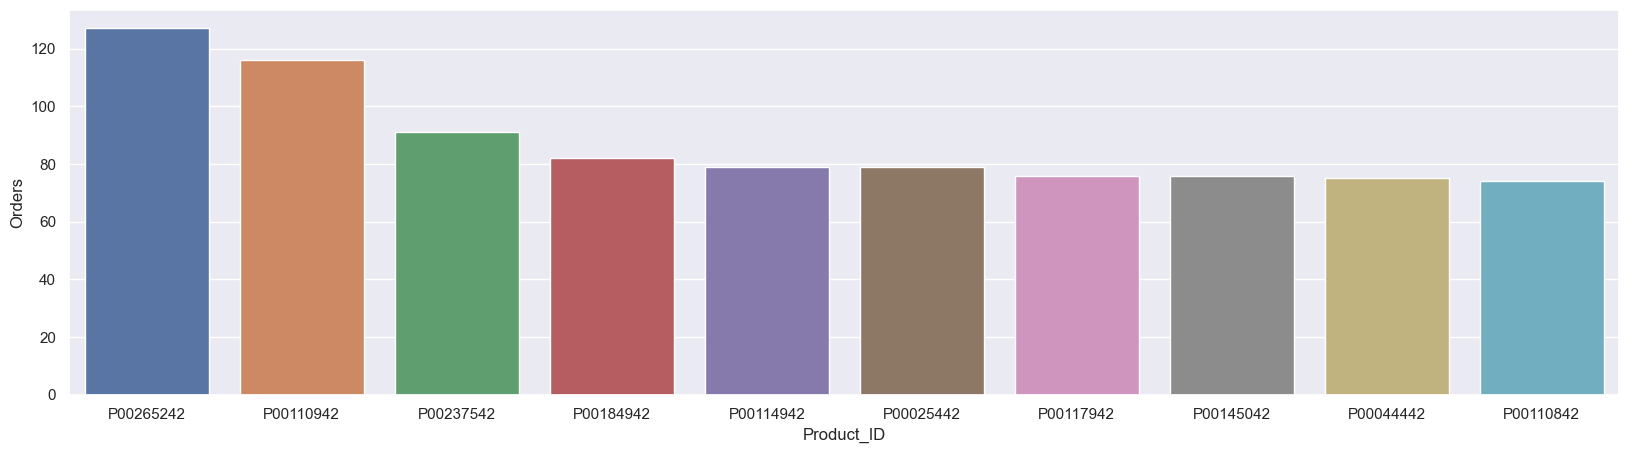

In [62]:
#plotting  top 10 most sold products 

sales_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc ={'figure.figsize':(20,5)})

sns.barplot(x = 'Product_ID', y ='Orders',hue='Product_ID',data = sales_id)


##### **Analyzing the visualizations above the insights obtained are;**

    1.The above chart shows Top 10 Product Ids  of products most Ordered.

    2.Product ID description shows 2350 unique values and  the top most Product ID is  P00265242

## **CONCLUSION**


In this project showing Diwali Sales in various States , I performed comprehensive data cleaning, visualization, and exploratory data analysis (EDA).  My primary focus was to understand the sales trends and patterns across various categorical variables such as Age Group, Gender ,product category, product ID, states and so on.Overall, the project successfully demonstrated the power of data cleaning and visualization techniques in uncovering valuable insights from a sales dataset. The findings can be utilized by businesses to strategize their marketing efforts, optimize inventory, and improve customer targeting.

#### ThankYou!

#### Author : ARYA S (www.linkedin.com/in/aryadataanalyst)

#### Dataset : https://github.com/Aryapersonal/PRODIGY_DS_01.git